# 2. Number of rows
This notebook contains dataset information, helpful to understand experimental results.



In [41]:
import pandas as pd

In [42]:
df = pd.read_csv('../data/bbsn00/flights-dataset.csv')

In [46]:
df.rows.min(), df.rows.max()

(223732, 659029)

In [49]:
# in MiB
f = 1024 * 1024
df['size_in_bytes'].min() / f, df['size_in_bytes'].max() / f

(95.84871196746826, 283.88797092437744)

In [50]:
# largest, smallest file (wrt to rows)?

In [52]:
df[df['rows'] == df['rows'].min()]

,path,year,month,size_in_bytes,rows
391,/hot/data/flights_all/flights_on_time_performa...,2020,6,100504659,223732


In [53]:
df[df['rows'] == df['rows'].max()]

,path,year,month,size_in_bytes,rows
381,/hot/data/flights_all/flights_on_time_performa...,2019,7,297678113,659029


In [54]:
import matplotlib.pyplot as plt

In [58]:
df['date'] = df[['year', 'month']].apply(lambda x: pd.to_datetime('{}-{}'.format(x['year'], x['month'])), axis=1)

In [60]:
df.head()

,path,year,month,size_in_bytes,rows,date
0,/hot/data/flights_all/flights_on_time_performa...,1987,10,186766812,448620,1987-10-01
1,/hot/data/flights_all/flights_on_time_performa...,1987,11,175988103,422803,1987-11-01
2,/hot/data/flights_all/flights_on_time_performa...,1987,12,183164752,440403,1987-12-01
3,/hot/data/flights_all/flights_on_time_performa...,1988,1,181080263,436950,1988-01-01
4,/hot/data/flights_all/flights_on_time_performa...,1988,2,171271551,412579,1988-02-01


Text(0, 0.5, 'rows per month')

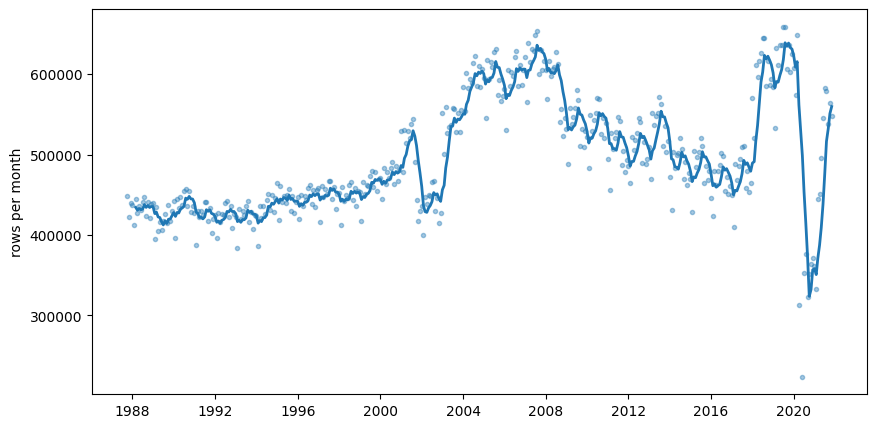

In [81]:
plt.figure(figsize=(10, 5))
plt.scatter(df['date'], df['rows'], marker='.', alpha=.4)
plt.plot(df['date'], df.set_index('date')['rows'].rolling(6).mean(), lw=2)
plt.ylabel('rows per month')

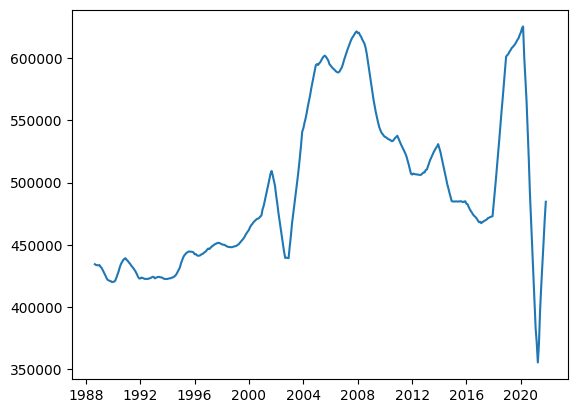